In [61]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm.auto

import tqdm
from numba import jit

In [54]:
def init_lattice(L):
    return np.random.choice([-1,1], size = (L,L))

In [55]:
def dE(s, i, j, L, J):
    t = s[i - 1 if i>0 else L-1, j]
    b = s[i + 1 if i<L-1 else 0, j]
    l = s[i, j - 1 if j>0 else L-1]
    r = s[i, j + 1 if j<L-1 else 0]

    return J * 2 * (t + b + l + r) * s[i, j]

In [56]:
def MonterCarlo_move(s, L, J):
    for _ in range(L):
        for _ in range(L):        
            i = random.randrange(L)
            j = random.randrange(L)
            ediff = dE(s,i,j,L, J)
            if ediff <= 0:
                s[i,j] = -s[i, j]
            elif random.random() < np.exp(-ediff):
                s[i,j] = -s[i, j]
    return s

In [57]:
def Energy(s, L, J):
    energy = 0
    for i in range(L):
        for j in range(L):
            S = s[i, j]
            nn = s[(i+1)%L, j] + s[i,(j+1)%L] + s[(i-1)%L, j] + s[i,(j-1)%L]
            energy += -nn*S   
    return J*energy/4

def Mag(s):
    return np.sum(s)


In [84]:
### Define algorithm parameters ###

temp_points = 30    #number of temperature points
L = 8               #lattice size
eq_limit = 10000    # Maximum iterations before equilibrum
mc_sweeps  = 10000  #Sweeps in Monte Carlo-sampling

T_list = np.linspace(0.5, 5, temp_points)        #change to real Boltzman constant if necessary
J_list = 1/(T_list)

s = init_lattice(L)
E, M = np.zeros(temp_points), np.zeros(temp_points)
 

In [85]:
def equilibriate(s, L, J, max_sweeps,stable_blocks = 5, block_size = 100, tol = 1e-4):
    N = L*L
    prev_block_avg = None
    stable_count = 0

    count = 0
    while count < max_sweeps:
        E_block = 0
        for _ in range(block_size):
            MonterCarlo_move(s,L,J)
            E_block += Energy(s, L, J) / N
            
        block_avg = E_block/block_size

        if prev_block_avg:
            if abs(block_avg - prev_block_avg) < tol:
                stable_count += 1
                if stable_count > stable_blocks:
                    break
            else:
                stable_count = 0
        
        prev_block_avg = block_avg
        count += block_size
    
    return count

In [86]:
def main():
    for n, J in tqdm(enumerate(J_list), total=len(J_list), desc="J loop"):   
        s = init_lattice(L)
        E_j = M_j = 0

        equilibriate(s, L, J, eq_limit)
        
        for _ in range(mc_sweeps):
            MonterCarlo_move(s,L,J)
            E_sample = Energy(s, L, J)
            M_sample = abs(Mag(s))
        
            E_j += E_sample
            M_j += M_sample
        
        E[n] = E_j/(mc_sweeps*L*L)
        M[n] = M_j/(mc_sweeps*L*L)

In [87]:
main()

# print(f'Energies: {E}')

# print(f'Magnetizations: {M}')































































J loop: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


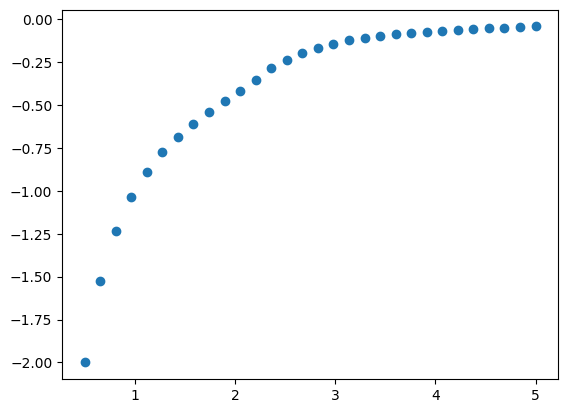

In [89]:


plt.scatter(T_list, E)
plt.show()